### Import Libraries and Dataset

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%y')
data=pd.read_csv("bitcoin_train.csv")


### Autocorrelation Plots
Only data from 2018 has stationarity

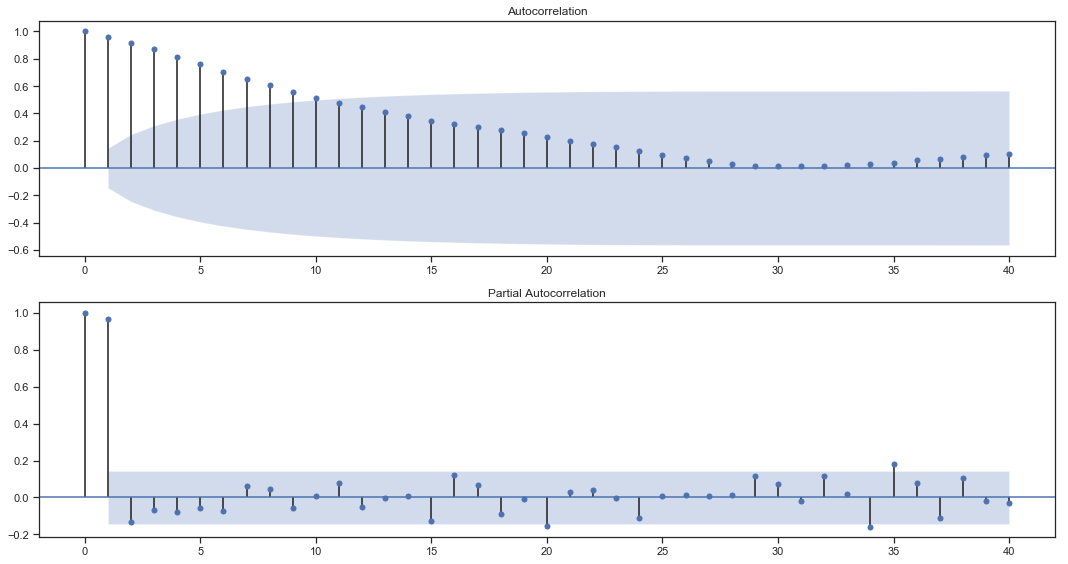

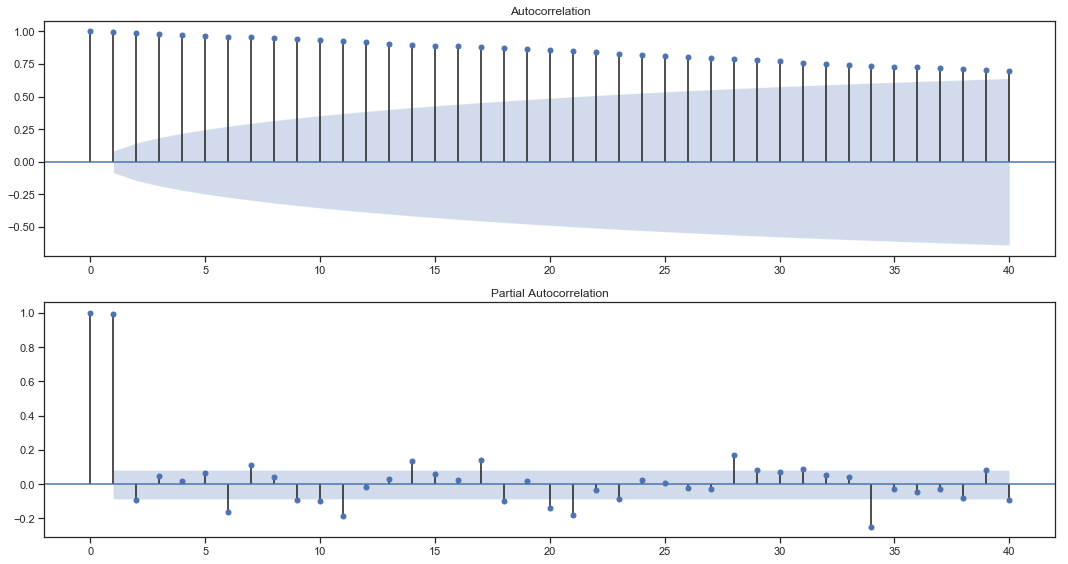

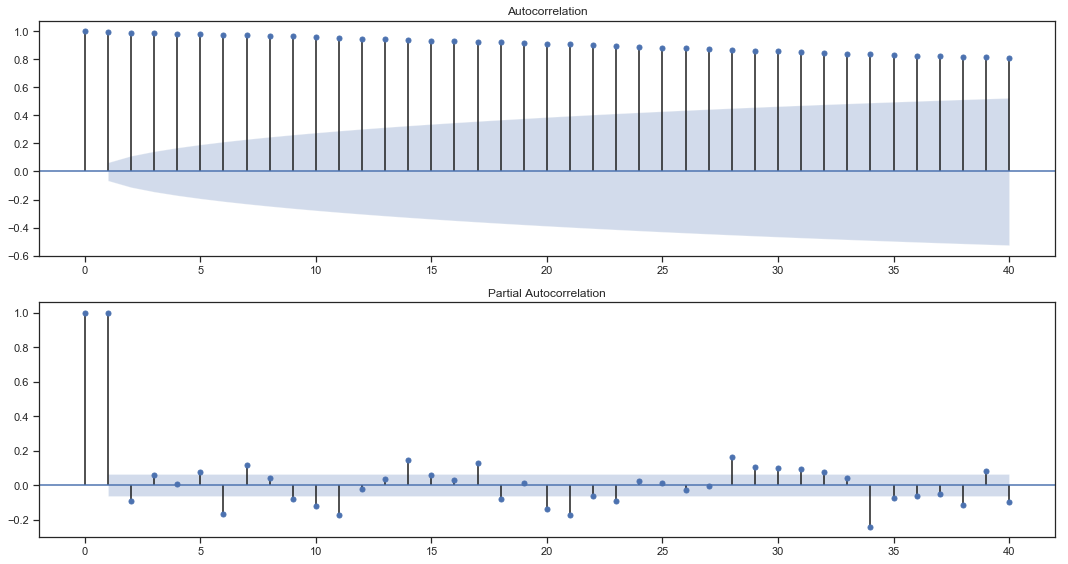

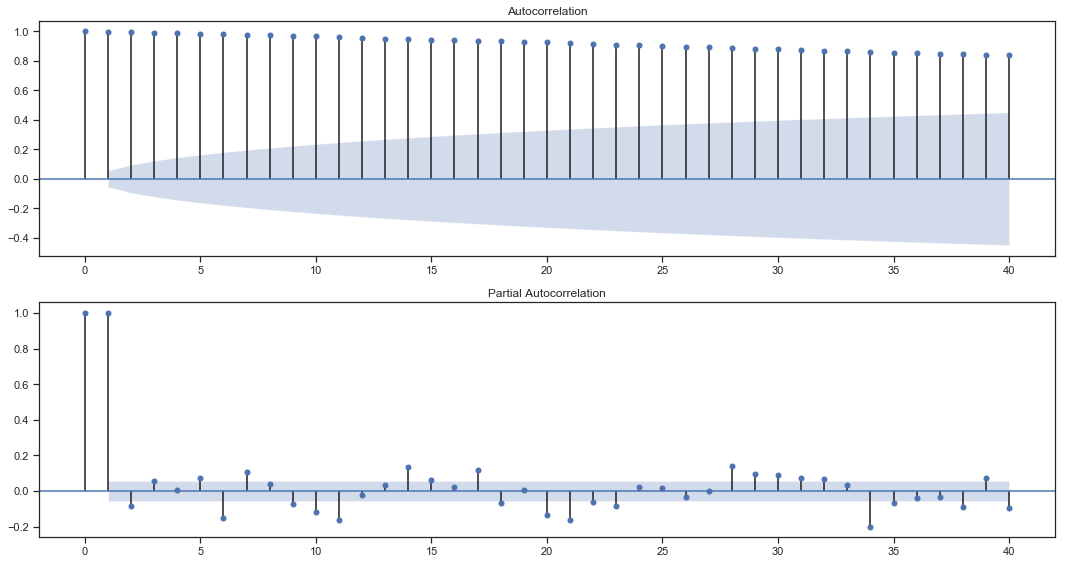

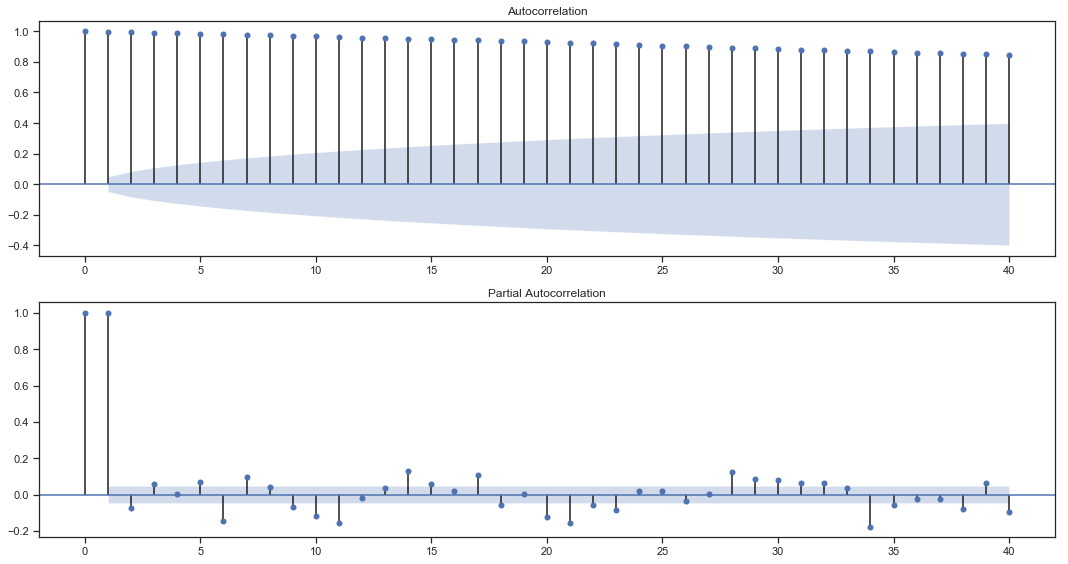

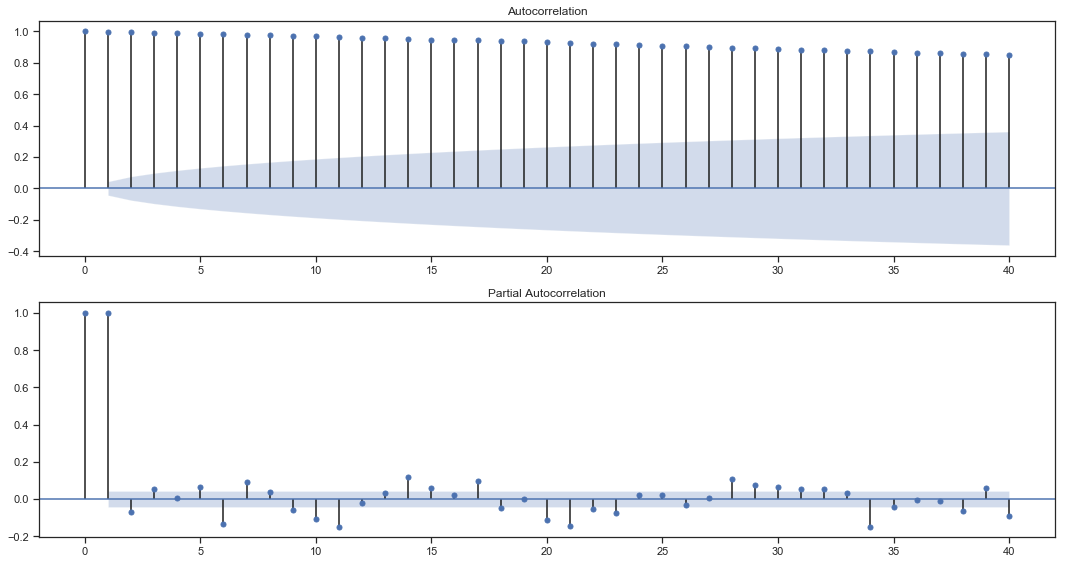

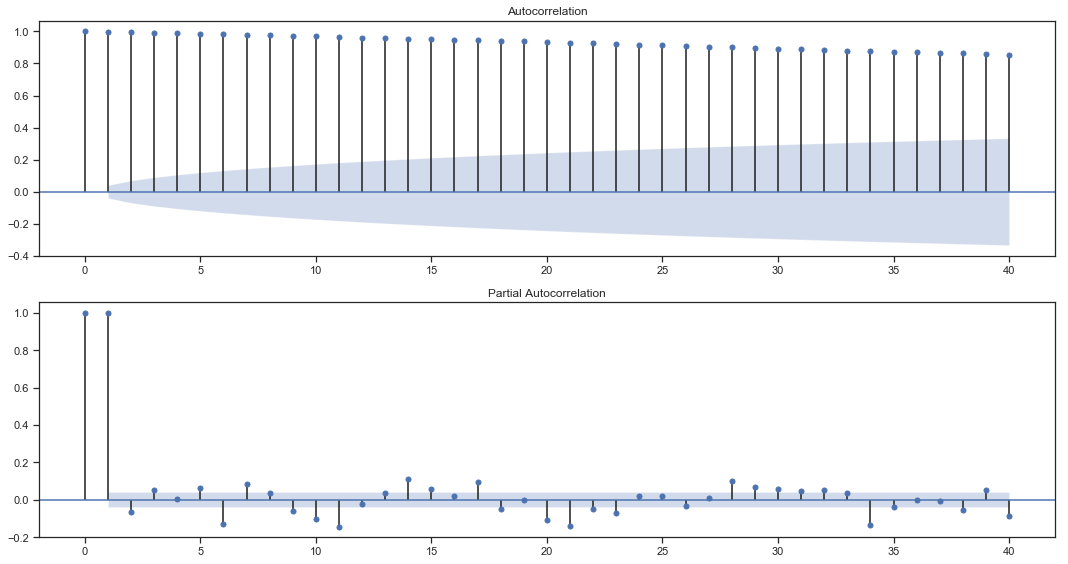

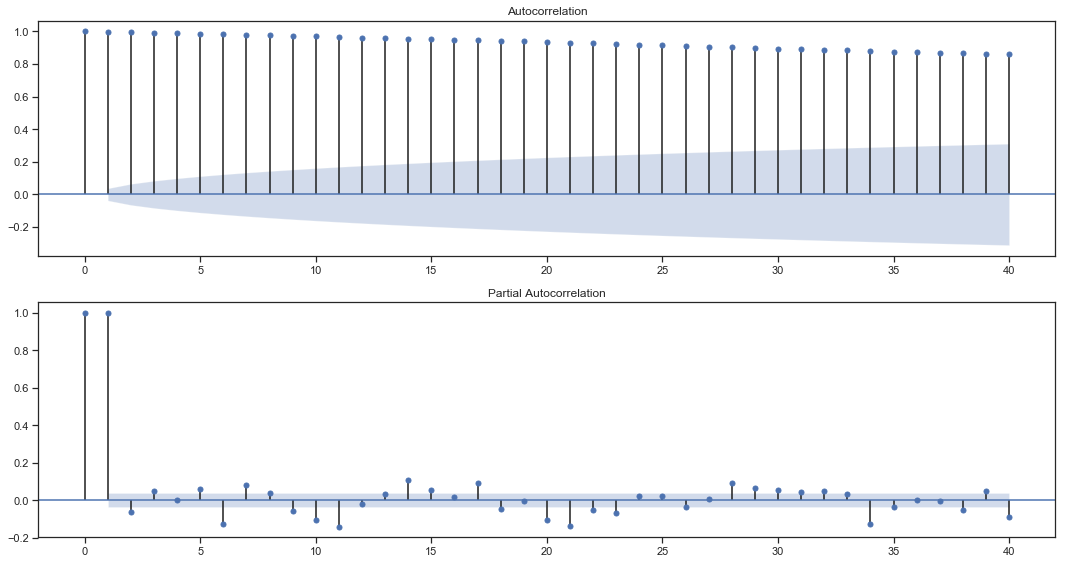

In [75]:
# Data period
periods = [2018,2017,2016,2015,2014,2013,2012,2011]

def plot_autocorrelation(year,month='01'):
    # Plot the Autocorrelation and Partial-Autocorrelation of the bitcoin prices
    df_train_startdate = str(year) + '-' + month + '-01'
    df_train_raw = pd.read_csv('bitcoin_train.csv', parse_dates=['date'], index_col='date', date_parser=dateparse)
    df_train = df_train_raw[df_train_startdate:].loc[:, ['close']]

    fig = plt.figure(figsize=(15, 8))
    ax1 = fig.add_subplot(2, 1, 1)
    fig = sm.graphics.tsa.plot_acf(df_train, lags=40, ax=ax1)
    ax1.xaxis.set_ticks_position('bottom')
    fig.tight_layout()

    ax2 = fig.add_subplot(2, 1, 2)
    fig = sm.graphics.tsa.plot_pacf(df_train, lags=40, ax=ax2)
    ax2.xaxis.set_ticks_position('bottom')
    fig.tight_layout()
    
for i in range(0,len(periods)):
    plot_autocorrelation(periods[i])
        

#### Check stationarity of data from each month of 2018

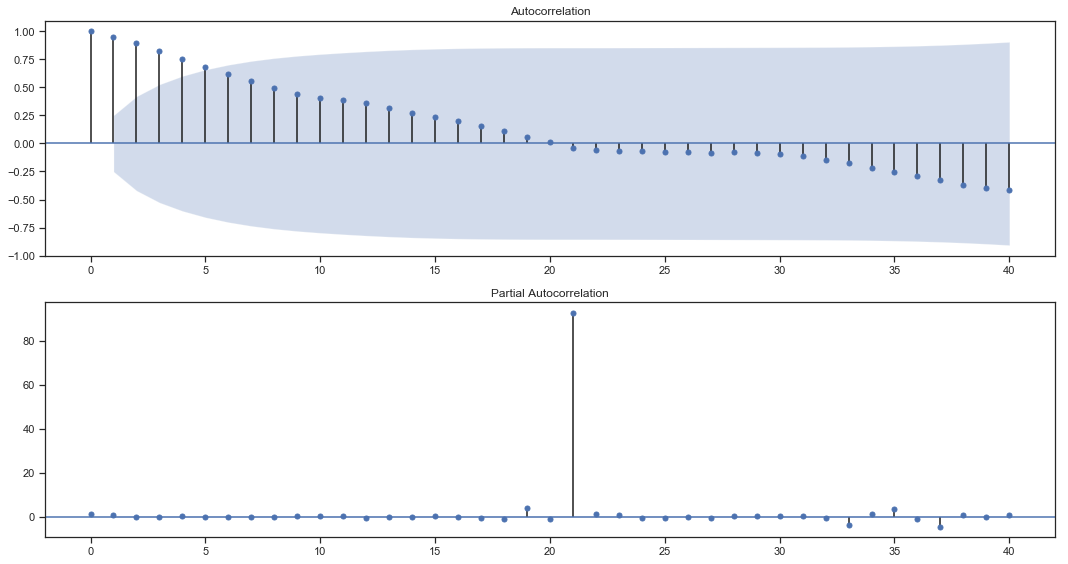

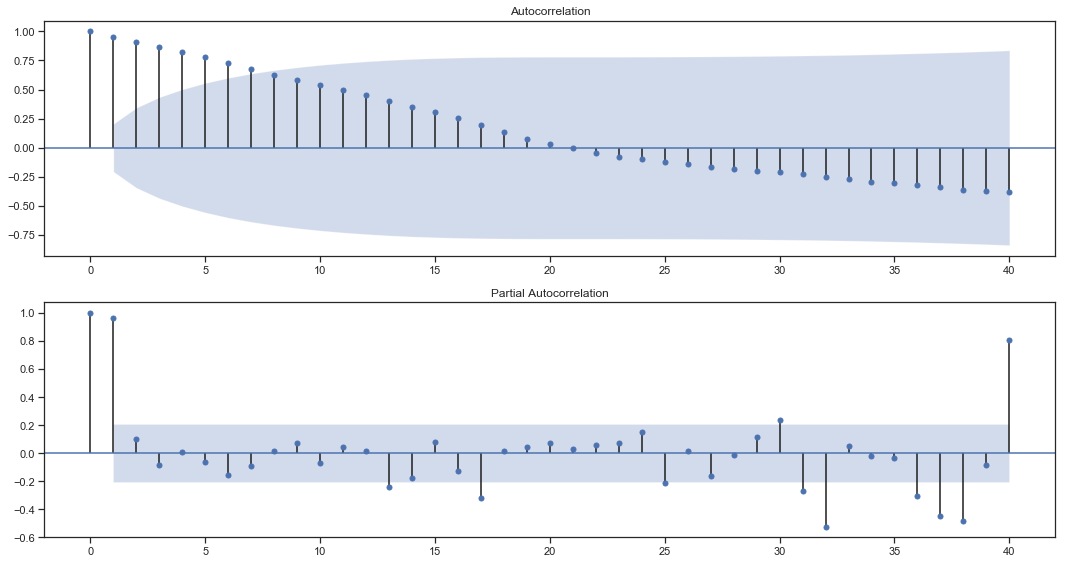

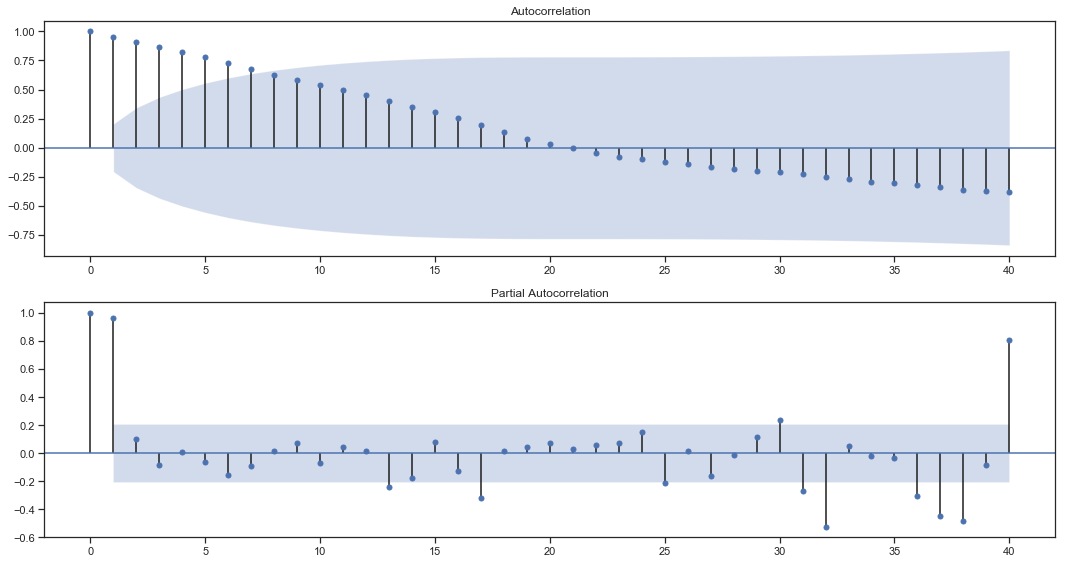

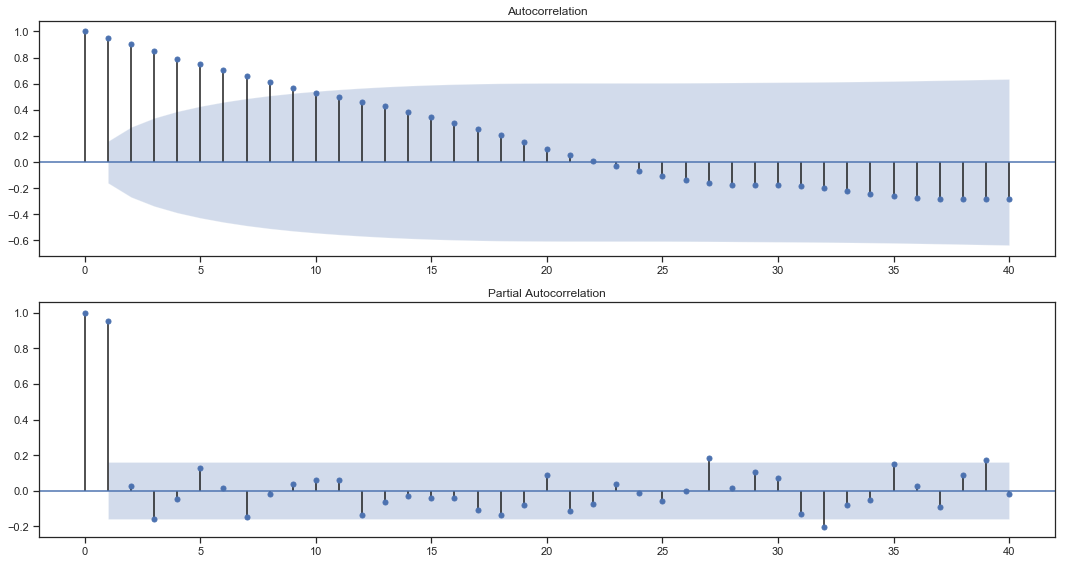

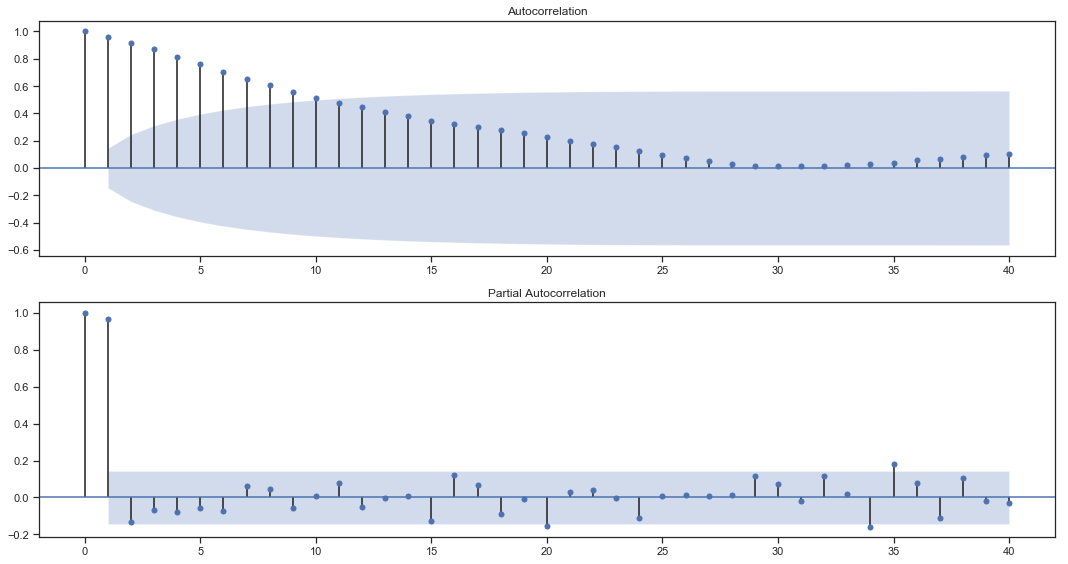

In [76]:
periods = ['05','04','04','02','01']
for i in range(0,len(periods)):
    plot_autocorrelation(2018,periods[i])
        

In [77]:
# We decide to use only data from March 2018 to train model
data = data.iloc[2613:]

### Correlation matrix

In [78]:
data.corr(method='pearson')

,open,high,low,close,volatility,volume,marketcap,google_trends,gold,silver,...,TXN_per_block,est_TXN_vol,cost_per_TXN,total_TXN_fees,usd_trade_vol,hash_rate,avg_block_size,difficulty,num_unique_addr,miners_revenue
open,1.000000e+00,9.906343e-01,9.813949e-01,9.669064e-01,1.458593e-01,6.869506e-01,9.998102e-01,3.812133e-01,4.362391e-01,2.800469e-02,...,2.011393e-01,6.205463e-01,6.544433e-01,4.162985e-01,3.806089e-01,-5.793326e-01,3.830246e-01,-6.274570e-01,3.330353e-01,8.770873e-01
high,9.906343e-01,1.000000e+00,9.827253e-01,9.848952e-01,1.890977e-01,7.196641e-01,9.896493e-01,4.064711e-01,4.569871e-01,2.381830e-02,...,1.961455e-01,6.377610e-01,6.501784e-01,4.158953e-01,4.006058e-01,-6.040686e-01,3.822742e-01,-6.544151e-01,3.343189e-01,8.661873e-01
low,9.813949e-01,9.827253e-01,1.000000e+00,9.871201e-01,6.056314e-03,6.615176e-01,9.819123e-01,2.983579e-01,4.246226e-01,3.252362e-02,...,2.061991e-01,6.087796e-01,6.373404e-01,4.046634e-01,3.337540e-01,-5.524077e-01,3.769980e-01,-6.004673e-01,3.585010e-01,8.618254e-01
close,9.669064e-01,9.848952e-01,9.871201e-01,1.000000e+00,8.686703e-02,7.036060e-01,9.663776e-01,3.520983e-01,4.408534e-01,2.546623e-02,...,1.869506e-01,6.092627e-01,6.400279e-01,3.983462e-01,3.564781e-01,-5.803571e-01,3.671113e-01,-6.301983e-01,3.354510e-01,8.464655e-01
volatility,1.458593e-01,1.890977e-01,6.056314e-03,8.686703e-02,1.000000e+00,3.885807e-01,1.378339e-01,6.187990e-01,2.270111e-01,-5.632935e-02,...,-4.030011e-02,2.058862e-01,1.363026e-01,8.305718e-02,3.727833e-01,-3.446568e-01,2.899405e-02,-3.590133e-01,-1.049503e-01,1.029472e-01
volume,6.869506e-01,7.196641e-01,6.615176e-01,7.036060e-01,3.885807e-01,1.000000e+00,6.885465e-01,3.842544e-01,4.283581e-01,9.644055e-02,...,3.564507e-01,5.939525e-01,2.698393e-01,3.167212e-01,3.373156e-01,-4.393496e-01,2.168077e-01,-4.350813e-01,3.745949e-01,5.542963e-01
marketcap,9.998102e-01,9.896493e-01,9.819123e-01,9.663776e-01,1.378339e-01,6.885465e-01,1.000000e+00,3.658971e-01,4.256520e-01,3.088978e-02,...,2.074400e-01,6.198119e-01,6.497003e-01,4.182778e-01,3.695749e-01,-5.674732e-01,3.846510e-01,-6.137396e-01,3.385215e-01,8.767508e-01
google_trends,3.812133e-01,4.064711e-01,2.983579e-01,3.520983e-01,6.187990e-01,3.842544e-01,3.658971e-01,1.000000e+00,5.836237e-01,-1.004323e-01,...,-8.117054e-02,3.069217e-01,3.562706e-01,6.491173e-02,6.785675e-01,-7.332331e-01,6.614138e-02,-7.812824e-01,-9.951443e-02,3.037462e-01
gold,4.362391e-01,4.569871e-01,4.246226e-01,4.408534e-01,2.270111e-01,4.283581e-01,4.256520e-01,5.836237e-01,1.000000e+00,2.770235e-01,...,-5.753622e-02,2.317548e-01,3.758724e-01,-5.900989e-02,4.015692e-01,-6.982254e-01,-3.914227e-02,-7.806667e-01,2.311046e-02,3.604560e-01
silver,2.800469e-02,2.381830e-02,3.252362e-02,2.546623e-02,-5.632935e-02,9.644055e-02,3.088978e-02,-1.004323e-01,2.770235e-01,1.000000e+00,...,8.115251e-02,-1.821417e-02,-3.791638e-02,-1.636438e-01,-1.148379e-01,1.310669e-01,-4.253807e-02,1.299672e-01,1.271166e-01,4.406013e-02


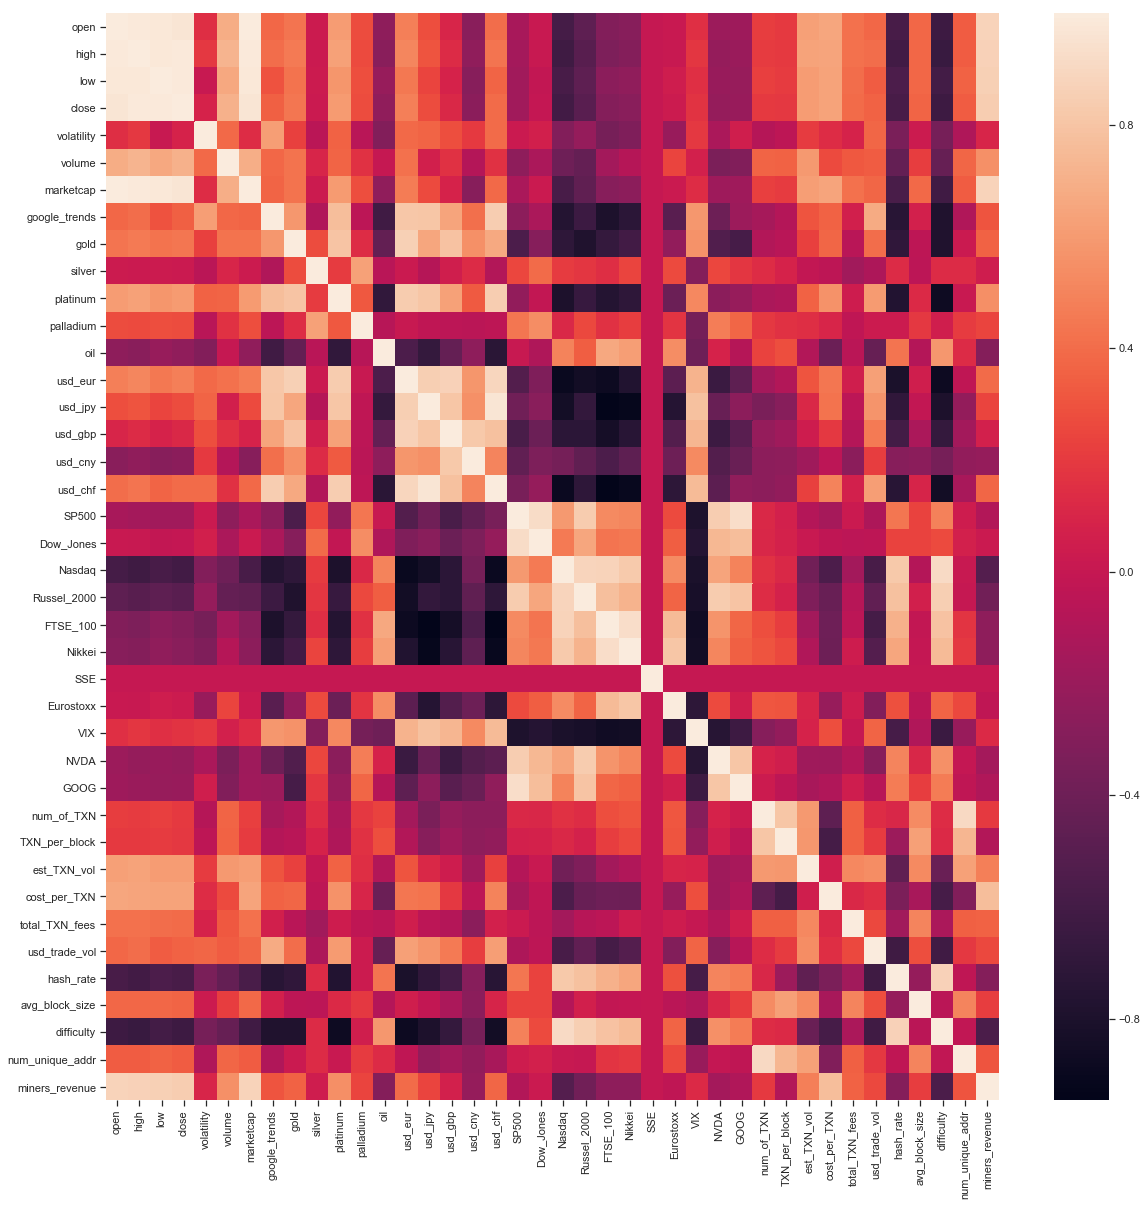

In [79]:
corr = data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(corr, 
            xticklabels=[col.replace("_price", "") for col in corr.columns.values],
            yticklabels=[col.replace("_price", "") for col in corr.columns.values],
            annot_kws={"size": 16})
plt.show()

#### Check multicollinearity

In [80]:
data.corr(method='pearson')[(corr >= 0.9) | (corr <= -0.9)]

,open,high,low,close,volatility,volume,marketcap,google_trends,gold,silver,...,TXN_per_block,est_TXN_vol,cost_per_TXN,total_TXN_fees,usd_trade_vol,hash_rate,avg_block_size,difficulty,num_unique_addr,miners_revenue
open,1.000000,0.990634,0.981395,0.966906,NaN,NaN,0.999810,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
high,0.990634,1.000000,0.982725,0.984895,NaN,NaN,0.989649,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
low,0.981395,0.982725,1.000000,0.987120,NaN,NaN,0.981912,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
close,0.966906,0.984895,0.987120,1.000000,NaN,NaN,0.966378,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatility,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volume,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marketcap,0.999810,0.989649,0.981912,0.966378,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
google_trends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
silver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Remove multicollinear variables that have very high correlation with close price 
data = data.drop(columns=['open','high','low','marketcap'])
data.head()

,date,close,volatility,volume,google_trends,gold,silver,platinum,palladium,oil,...,TXN_per_block,est_TXN_vol,cost_per_TXN,total_TXN_fees,usd_trade_vol,hash_rate,avg_block_size,difficulty,num_unique_addr,miners_revenue
2613,1/3/18,10951.0,0.065391,7.317280e+09,11.0,1307.75,16.315,969.0,1011.0,60.98,...,1220.793548,2.094369e+09,108.994016,531980.0107,871257588.0,23172168.75,1.054216,3.010000e+12,469400,20144045.51
2614,2/3/18,11086.4,0.030757,7.620590e+09,11.0,1322.30,16.445,968.0,993.0,61.19,...,1416.630303,2.018302e+09,99.595931,573101.5759,790675903.7,24667147.38,1.068241,3.010000e+12,514904,22728868.45
2615,3/3/18,11489.7,0.046683,6.690570e+09,11.0,1322.30,16.445,968.0,993.0,61.19,...,1250.467949,1.317222e+09,112.897919,464496.4666,673860238.9,23321666.61,0.861064,3.010000e+12,524246,21569895.07
2616,4/3/18,11512.6,0.033250,6.084150e+09,10.0,1322.30,16.445,968.0,993.0,61.19,...,983.466667,1.034631e+09,146.396239,430013.9903,663520514.0,26909615.32,0.976834,3.010000e+12,416966,25485633.75
2617,5/3/18,11573.3,0.022482,6.468540e+09,11.0,1320.40,16.510,957.0,983.0,62.49,...,1082.641892,1.054511e+09,134.358251,382520.8819,542742758.5,22125683.71,1.002854,3.010000e+12,383191,21145836.08


### Historgram of each feature

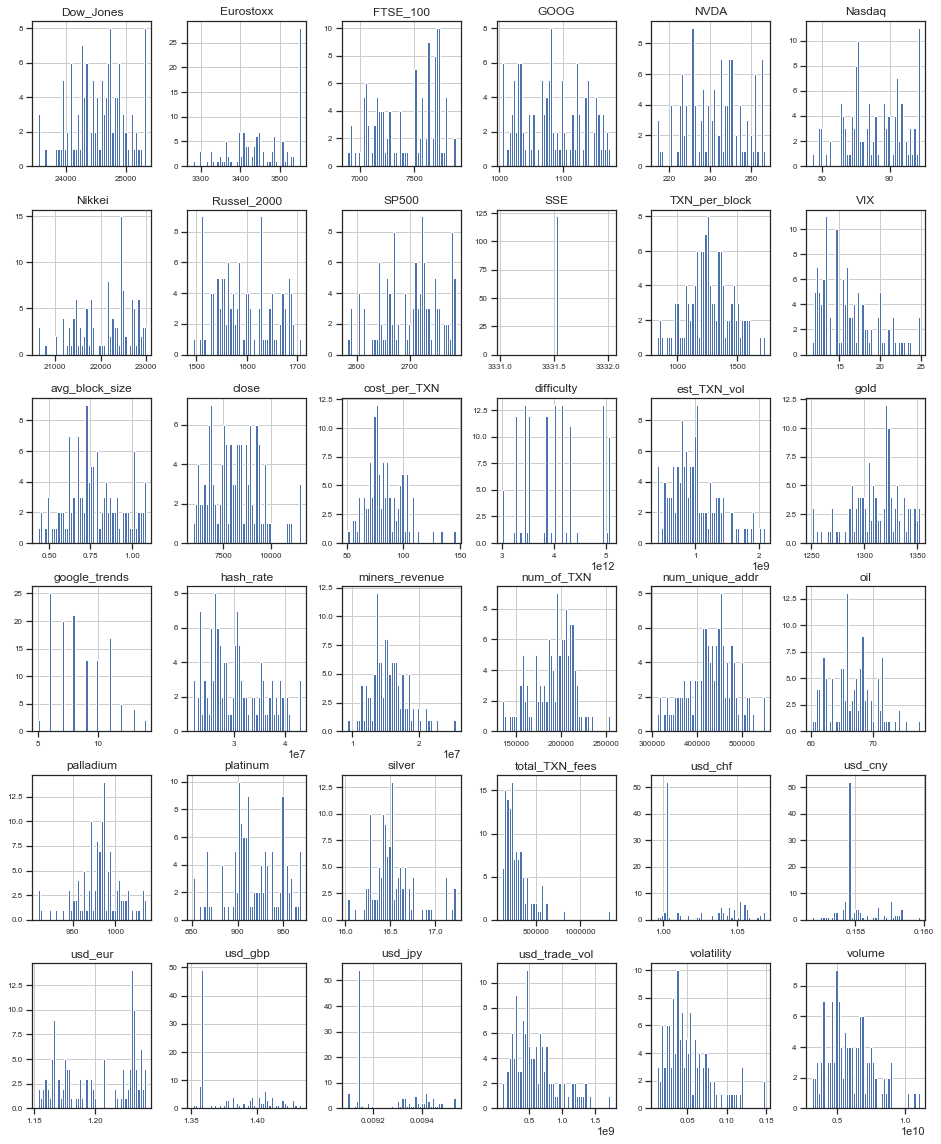

In [83]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

### Scatter Plots between price and features

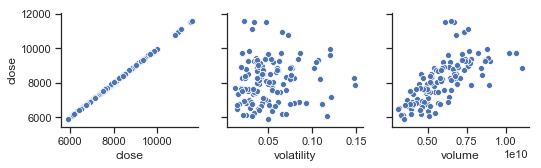

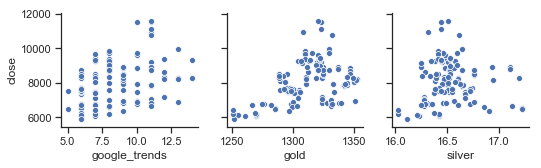

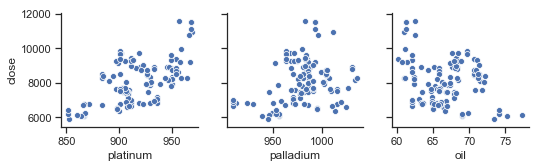

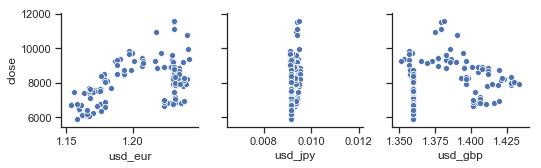

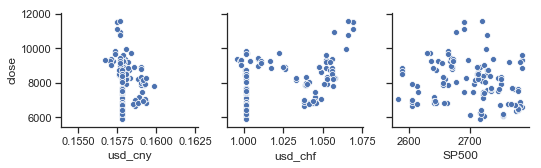

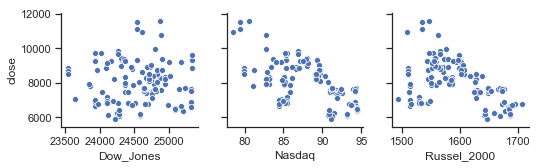

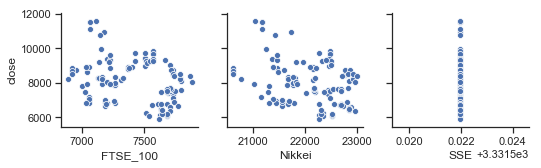

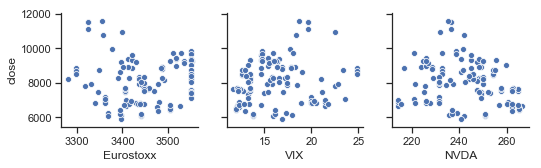

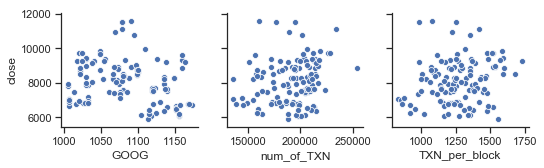

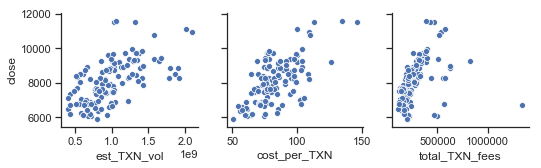

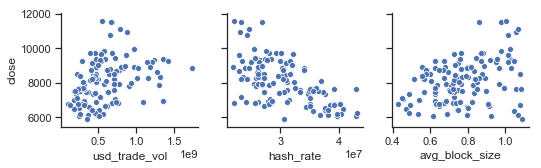

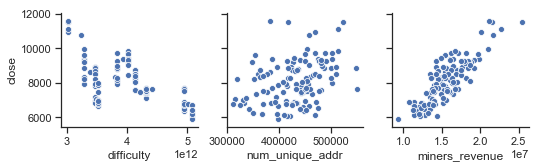

In [84]:

%matplotlib inline
sns.set_context('notebook')
sns.set(style="ticks", color_codes=True)

for i in range(0, len(data.iloc[:,1:].columns), 3):
    sns.pairplot(data=data.iloc[:,1:],
                x_vars=data.iloc[:,1:].columns[i:i+3],
                y_vars=['close'])

In [85]:
# Remove SSE and usd_jpy which have almost no correlation with close price
data = data.drop(columns=['SSE','usd_jpy'])
data.head()

,date,close,volatility,volume,google_trends,gold,silver,platinum,palladium,oil,...,TXN_per_block,est_TXN_vol,cost_per_TXN,total_TXN_fees,usd_trade_vol,hash_rate,avg_block_size,difficulty,num_unique_addr,miners_revenue
2613,1/3/18,10951.0,0.065391,7.317280e+09,11.0,1307.75,16.315,969.0,1011.0,60.98,...,1220.793548,2.094369e+09,108.994016,531980.0107,871257588.0,23172168.75,1.054216,3.010000e+12,469400,20144045.51
2614,2/3/18,11086.4,0.030757,7.620590e+09,11.0,1322.30,16.445,968.0,993.0,61.19,...,1416.630303,2.018302e+09,99.595931,573101.5759,790675903.7,24667147.38,1.068241,3.010000e+12,514904,22728868.45
2615,3/3/18,11489.7,0.046683,6.690570e+09,11.0,1322.30,16.445,968.0,993.0,61.19,...,1250.467949,1.317222e+09,112.897919,464496.4666,673860238.9,23321666.61,0.861064,3.010000e+12,524246,21569895.07
2616,4/3/18,11512.6,0.033250,6.084150e+09,10.0,1322.30,16.445,968.0,993.0,61.19,...,983.466667,1.034631e+09,146.396239,430013.9903,663520514.0,26909615.32,0.976834,3.010000e+12,416966,25485633.75
2617,5/3/18,11573.3,0.022482,6.468540e+09,11.0,1320.40,16.510,957.0,983.0,62.49,...,1082.641892,1.054511e+09,134.358251,382520.8819,542742758.5,22125683.71,1.002854,3.010000e+12,383191,21145836.08
